**Data professionals' job data**

- Let's illustrate how missing data impacts exploratory analysis using a dataset about data professionals. 
- This dataset includes the year the data was obtained, job title, experience level, type of employment, location, company size, time spent working remotely, and salary in US dollars.

| Column                | Description                                    | Data type  |
|-----------------------|------------------------------------------------|------------|
| `Working_Year`        | Year the data was obtained                     | Float      |
| `Designation`         | Job title                                      | String     |
| `Experience`          | Experience level e.g., "Mid", "Senior"         | String     |
| `Employment_Status`   | Type of employment contract e.g., "FT", "PT"   | String     |
| `Employee_Location`   | Country of employment                          | String     |
| `Company_Size`        | Labels for company size e.g., "S", "M", "L"    | String     |
| `Remote_Working_Ratio`| Percentage of time working remotely            | Integer    |
| `Salary_USD`          | Salary in US dollars                           | Float      |

**Salary by experience level**

- To highlight the impact of missing values, let's look at salaries by experience level using a full version of the dataset. 
- Now, let's compare this to the same data with some missing values. 
- The y-axis shows that the largest salary is around 150000 dollars less in the second plot!

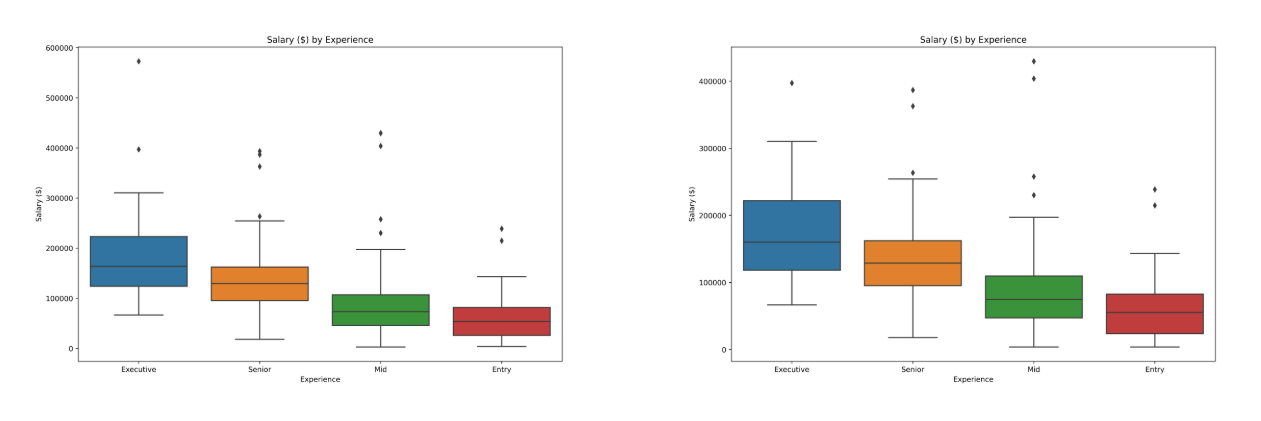

# **Checking for missing values**

- With our dataset stored as a pandas DataFrame called salaries, we can count the number of missing values per column by chaining the dot-isna and dot-sum methods. 
- `isna` refers to the fact that missing values are represented as na in DataFrames.
- The output shows all columns contain missing values, with Salary_USD missing 60 values.

In [ ]:
print(salaries.isna().sum())

In [ ]:
Working_Year	        |12
Designation	            |27
Experience	            |33
Employment_Status	    |31
Employee_Location	    |28
Company_Size	        |40
Remote_Working_Ratio	|24
Salary_USD	            |60
dtype: int64

# **Strategies for addressing missing data**

- There are various approaches to handle missing data. One rule of thumb is to remove observations if they amount to five percent or less of all values. 
- If we have more missing values, instead of dropping them, we can replace them with a summary statistic like the mean, median, or mode, depending on the context. 
- This is known as imputation. 
- Alternatively, we can impute by sub-groups. We saw that median salary varies by experience, so we could impute different salaries depending on experience.

- Drop missing values
  - 5% or less of total values
- Impute mean, median, mode
  - Depends on distribution and context
- Impute by sub-group
  - Different experience levels have different median salary

# **Dropping missing values**

- To calculate our missing values threshold we multiply the length of our DataFrame by five percent, giving us an upper limit of 30.

In [ ]:
# Calculate the threshold as 5% of the length of the salaries list.
threshold = len(salaries) * 0.05

# Print the calculated threshold.
print(threshold)

In [ ]:
30

- We can use Boolean indexing to filter for columns with missing values less than or equal to this threshold, storing them as a variable called cols_to_drop. 
- Printing cols_to_drop shows four columns. 
- We drop missing values by calling dot-dropna, passing cols_to_drop to the subset argument. 
- We set inplace to True so the DataFrame is updated.

In [ ]:
# Assuming 'salaries' is a pandas DataFrame
# and 'threshold' is a pre-defined value.

cols_to_drop = salaries.columns[salaries.isna().sum() <= threshold]
print(cols_to_drop)

In [ ]:
Index(['Working_Year', 'Designation', 'Employee_Location',
       'Remote_Working_Ratio'],
      dtype='object')

In [ ]:
salaries.dropna(subset=cols_to_drop, inplace=True)

# **Imputing a summary statistic**

- We then filter for the remaining columns with missing values, giving us four columns. 
- To impute the mode for the first three columns, we loop through them and call the dot-fillna method, passing the respective column's mode and indexing the first item, which contains the mode, in square brackets.

In [ ]:
# Find columns with missing values in a DataFrame called 'salaries'
cols_with_missing_values = salaries.columns[salaries.isna().sum() > 0]

# Print the names of the columns with missing values
print(cols_with_missing_values)

In [ ]:
Index(['Experience', 'Employment_Status', 'Company_Size', 'Salary_USD'], dtype='object')

In [ ]:
# Iterate through columns with missing values (excluding the last column)
for col in cols_with_missing_values[:-1]:
    # Fill missing values in each column with the mode (most frequent value) of that column
    salaries[col].fillna(salaries[col].mode()[0], inplace=True)

# **Checking the remaining missing values**

- Checking for missing values again, we see salary_USD is now the only column with missing values and the volume has changed from 60 missing values to 41. 
- This is because some rows may have contained missing values for our subset columns as well as salary, so they were dropped.

In [ ]:
print(salaries.isna().sum())

In [ ]:
Working_Year	        0
Designation	            0
Experience	            0
Employment_Status	    0
Employee_Location	    0
Company_Size	        0
Remote_Working_Ratio	0
Salary_USD	           41

# **Imputing by sub-group**

- We'll impute median salary by experience level by grouping salaries by experience and calculating the median. 
- We use the dot-to-dict method, storing the grouped data as a dictionary. 
- Printing the dictionary returns the median salary for each experience level, with executives earning the big bucks!

In [ ]:
salaries_dict = salaries.groupby("Experience")["Salary_USD"].median().to_dict()
print(salaries_dict)

In [ ]:
{'Entry': 55380.0, 'Executive': 135439.0, 'Mid': 74173.5, 'Senior': 128903.0}

In [ ]:
# Fill NaN values in 'Salary_USD' column using a mapping from 'Experience' column.
salaries["Salary_USD"] = salaries["Salary_USD"].fillna(salaries["Experience"].map(salaries_dict))

print(salaries.isna().sum())

**No more missing values!**

In [ ]:
Working_Year             0
Designation              0
Experience               0
Employment_Status        0
Employee_Location        0
Company_Size             0
Remote_Working_Ratio     0
Salary_USD               0
dtype: int64